## This Notebook aims to answer the following questions:
**Q1: Do movies (a) or shows (b) on Netflix with an older release year have a better average IMDb ratings?**

**Q2: Do movies (a) or shows (b) on Netflix with a more positive description get better IMDb ratings?**

**Q3: Do movies or shows on Netflix get better IMDb ratings (a) or more IMDb votes (b)?**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FixedLocator, FuncFormatter
from scipy.stats import pearsonr
from transformers import pipeline
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from typing import Tuple
from scipy.stats import levene
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
df = pd.read_csv("Netflix data classified")
df = df.drop(columns=["Unnamed: 0", "index"], axis=1)

In [3]:
# BERT model (used because it performed the best in A3)
# the classification was stored and exported, so it doesn't have to be run every time

# original Data Source: 
# https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores?resource=download

# df = pd.read_csv("Netflix TV Shows and Movies.csv")
# df.drop(["id", "imdb_id"], axis=1, inplace=True)

# sentiment_pipeline = pipeline(model=f"cardiffnlp/twitter-roberta-base-sentiment-latest")
# df = df.dropna(subset=["description"]) 
# df_class = sentiment_pipeline(df["description"].to_list())
# df["Bert_class"] = [result["label"] for result in df_class]

# df.to_csv("Netflix data classified", sep=",")

In [4]:
df.describe()

,release_year,runtime,imdb_score,imdb_votes
count,5278.000000,5278.000000,5278.000000,5.263000e+03
mean,2015.878363,79.210117,6.534236,2.342496e+04
std,7.348958,38.928918,1.160390,8.716504e+04
min,1953.000000,0.000000,1.500000,5.000000e+00
25%,2015.000000,45.000000,5.800000,5.220000e+02
50%,2018.000000,87.000000,6.600000,2.281000e+03
75%,2020.000000,106.000000,7.400000,1.015500e+04
max,2022.000000,235.000000,9.600000,2.268288e+06


## Q1: Do movies (a) or shows (b) on Netflix with an older release year have a better average IMDb ratings?

In [5]:
def year_rating_r(type: str, data: pd.DataFrame = df) -> Tuple[float]:
    
    filtered_df = data[data["type"] == type]
    filtered_df_mean = filtered_df.groupby("release_year")["imdb_score"].mean()

    r, p = pearsonr(filtered_df_mean.index, filtered_df_mean)
    
    return filtered_df, filtered_df_mean, r, p

#Movies
movies_df, movies_df_mean, r, p = year_rating_r("MOVIE")
print(f"Movies on Netflix with a more recent release year on average have worse ratings on IMDb, r = {r:.2f}, p = {p:.4f}.\n")

#Shows
shows_df, shows_df_mean, r, p = year_rating_r("SHOW")
print(f"No relationship between the release year and the IMDb ratings were found for Netflix shows, r = {r:.2f}, p = {p:.4f}.")

Movies on Netflix with a more recent release year on average have worse ratings on IMDb, r = -0.43, p = 0.0003.

No relationship between the release year and the IMDb ratings were found for Netflix shows, r = 0.01, p = 0.9555.


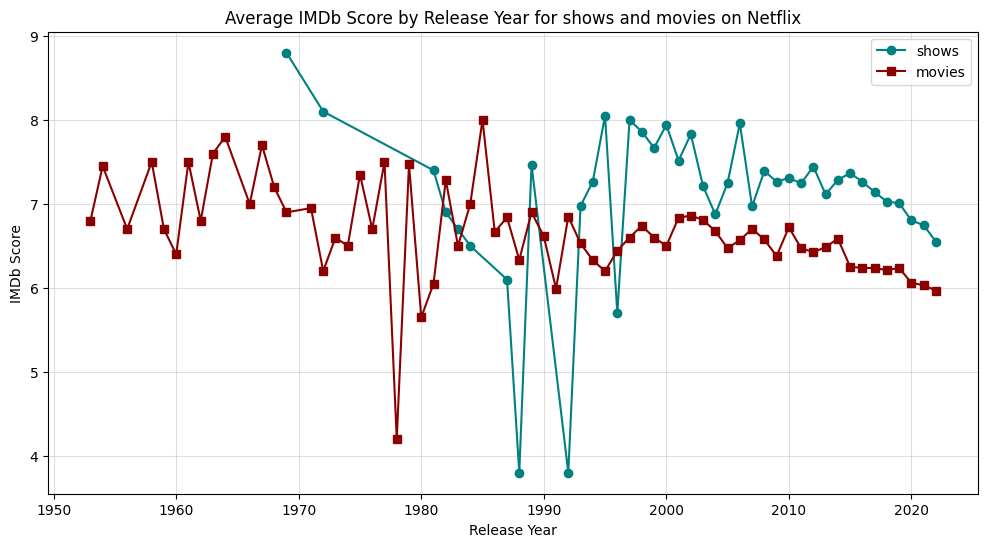

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(
    shows_df_mean.index,
    shows_df_mean,
    color="teal",
    marker="o",
    label="shows"
)

plt.plot(
    movies_df_mean.index,
    movies_df_mean,
    color="darkred",
    marker="s",
    label="movies"
)

plt.xlabel("Release Year")
plt.ylabel("IMDb Score")
plt.title("Average IMDb Score by Release Year for shows and movies on Netflix")
plt.grid(True, alpha=.4)
plt.legend()
#1978 only one movie "Bandie"

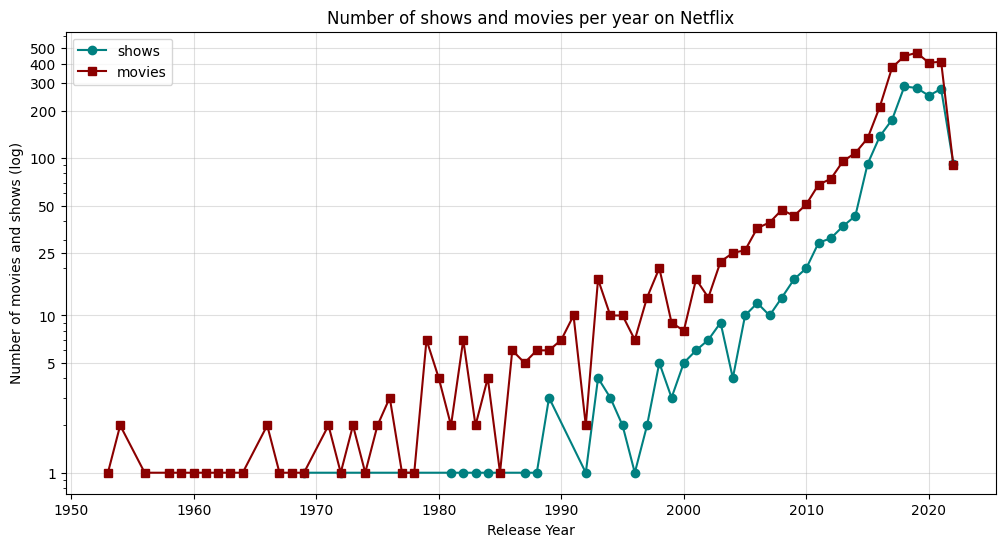

In [7]:
movies_year = movies_df.groupby("release_year")["release_year"].count()
shows_year = shows_df.groupby("release_year")["release_year"].count()

plt.figure(figsize=(12, 6))
plt.plot(
    shows_year.index,
    shows_year,
    color="teal",
    marker="o",
    label="shows"
)

plt.plot(
    movies_year.index,
    movies_year,
    color="darkred",
    marker="s",
    label="movies"
)

plt.xlabel("Release Year")
plt.ylabel("Number of movies and shows (log)")
plt.yscale("log")

ax = plt.gca()
custom_ticks = [1, 5, 10, 25, 50, 100, 200, 300, 400, 500]
ax.yaxis.set_major_locator(FixedLocator(custom_ticks))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.title("Number of shows and movies per year on Netflix")
plt.grid(True, alpha=.4)
plt.legend()

In [8]:
#Analysis starting year 2000
df_filtered = df[df["release_year"] >= 2000]
#Movies
movies_df_filterd, movies_df_mean_filtered, r_filtered, p_filtered = year_rating_r("MOVIE", df_filtered)
print(f"Movies on Netflix with a more recent release year on average have worse ratings on IMDb, r = {r_filtered:.2f}, p = {p_filtered:.4f}.\n")

#Shows
showss_df_filterd, shows_df_mean_filtered, r_filtered, p_filtered = year_rating_r("SHOW", df_filtered)
print(f"Shows on Netflix with a more recent release year on average have worse ratings on IMDb, r = {r_filtered:.2f}, p = {p_filtered:.4f}.")

Movies on Netflix with a more recent release year on average have worse ratings on IMDb, r = -0.87, p = 0.0000.

Shows on Netflix with a more recent release year on average have worse ratings on IMDb, r = -0.68, p = 0.0004.


In [9]:
movies_df.describe()

,release_year,runtime,imdb_score,imdb_votes
count,3403.000000,3403.000000,3403.000000,3.388000e+03
mean,2015.200118,101.569791,6.267793,2.670682e+04
std,8.226595,27.756713,1.116425,9.474863e+04
min,1953.000000,8.000000,1.500000,5.000000e+00
25%,2014.000000,88.000000,5.600000,5.807500e+02
50%,2018.000000,100.000000,6.400000,2.640000e+03
75%,2020.000000,116.000000,7.100000,1.228875e+04
max,2022.000000,235.000000,9.000000,2.268288e+06


In [10]:
shows_df.describe()

,release_year,runtime,imdb_score,imdb_votes
count,1875.000000,1875.000000,1875.000000,1.875000e+03
mean,2017.109333,38.628800,7.017813,1.749487e+04
std,5.183536,17.696716,1.079840,7.108993e+04
min,1969.000000,0.000000,1.600000,5.000000e+00
25%,2016.000000,24.000000,6.450000,4.450000e+02
50%,2018.000000,41.000000,7.200000,1.794000e+03
75%,2020.000000,49.000000,7.800000,7.218500e+03
max,2022.000000,178.000000,9.600000,1.727694e+06


## Q2: Do movies (a) or shows (b) on Netflix with a more positive description get better IMDb ratings?

Homogeneity of Variances (Homoscedasticity):
Levene's Test Statistic: 2.67
Levene's Test p-value: 0.069
There is no significant evidence to reject the null hypothesis of equal variances.

One-way ANOVA Results:
F-statistic: 21.03
p-value: 0.000

The p-value (0.000) is less than 0.05.
There is a statistically significant difference in imdb_score across sentiment categories.

Summary Statistics:
            count  mean  median   std  min  max
Bert_class                                     
negative      842  6.08     6.2  1.14  1.5  8.7
neutral      2036  6.29     6.4  1.08  1.7  9.0
positive      525  6.47     6.6  1.15  2.1  9.0

Tukey's HSD Pairwise Comparisons:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower  upper  reject
------------------------------------------------------
negative  neutral   0.2151    0.0 0.1084 0.3217   True
negative positive    0.386    0.0 0.2412 0.5307   True
 neutral positive   0.1709 0.0048 0.0435 0.2983   Tru

<Figure size 1200x800 with 0 Axes>

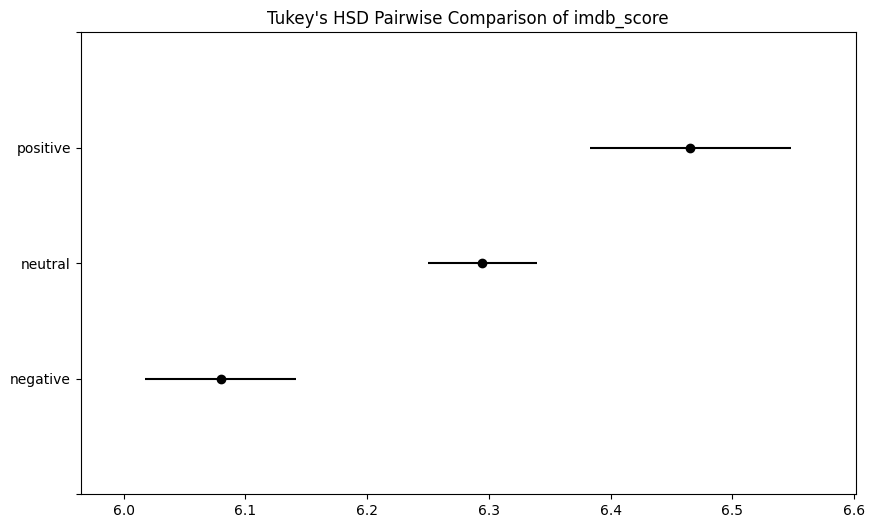

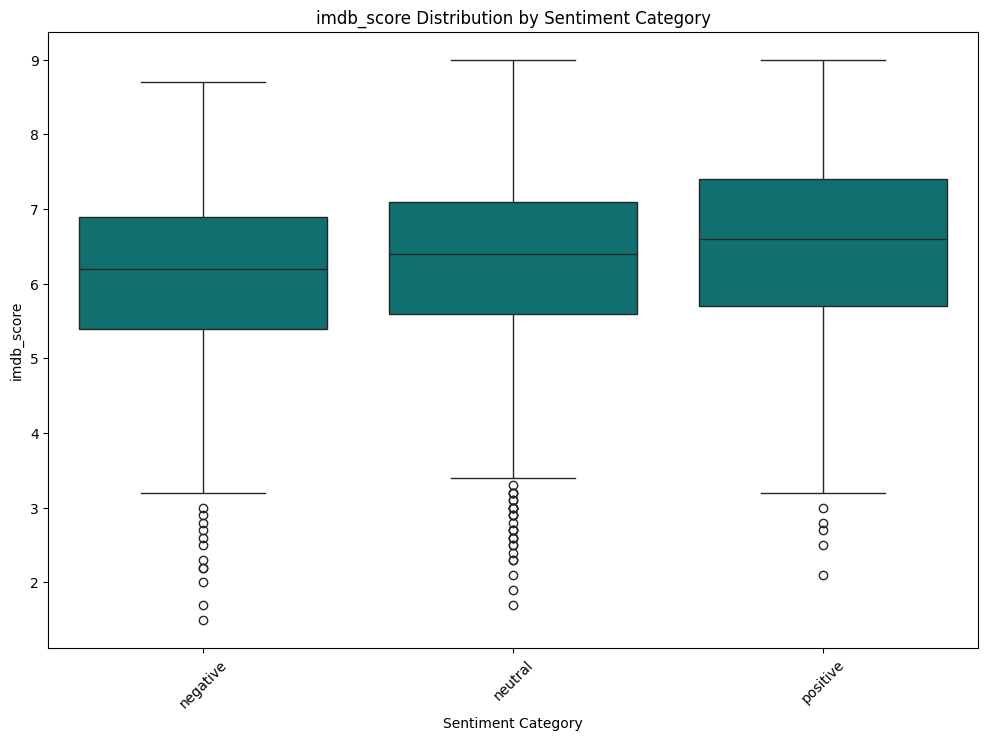

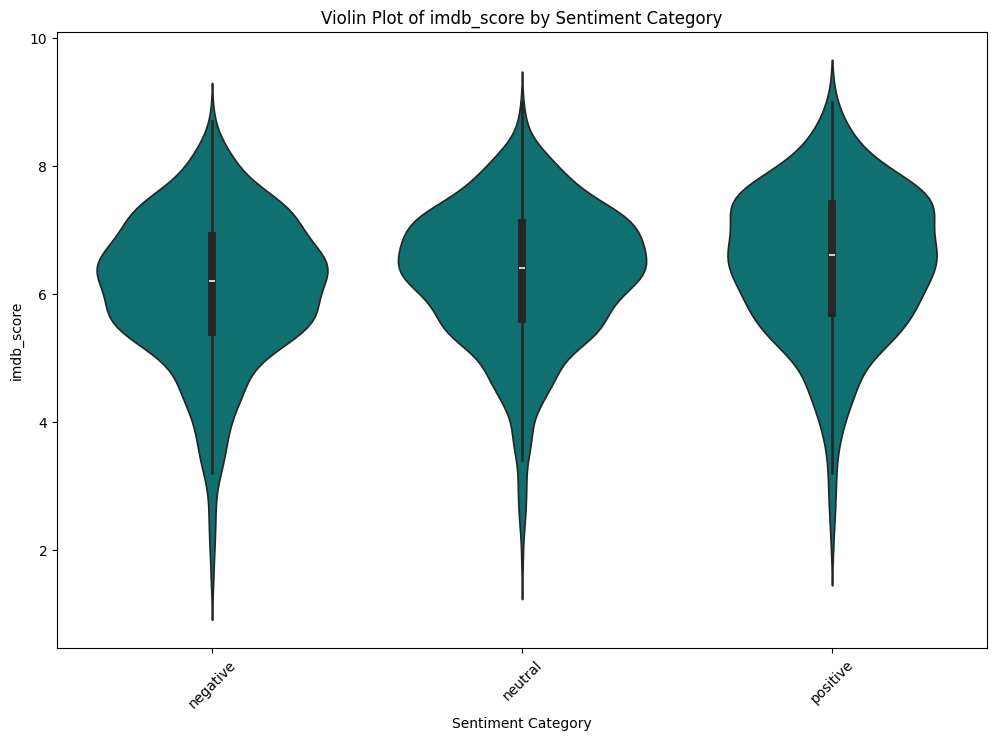

In [11]:
def sentiment_anova(data: pd.DataFrame, column: str, grouping: str ="Bert_class") -> None:
    """
    Perform a levene test, ANOVA and shows pairwise comparison and then plot the pairwise comparison, box plot and violin plot with the data.

    Parameters:

        data (DataFrame): dataset used.
        column (str): column name from the DataFrame to use for the comparison
        grouping (str): column name by which to group the data by

    Returns:
        None
    """
    # Group the data by sentiment category
    sentiment_groups = [group[column].values for name, group in data.groupby(grouping, observed=False)]

    # Perform Levene's test
    stat, p_value = levene(*sentiment_groups)

    # Print results
    print("Homogeneity of Variances (Homoscedasticity):")
    print(f"Levene's Test Statistic: {stat:.2f}")
    print(f"Levene's Test p-value: {p_value:.3f}")

    # Interpretation
    if p_value < 0.05:
        print("There is significant evidence to reject the null hypothesis of equal variances.")
    else:
        print("There is no significant evidence to reject the null hypothesis of equal variances.")
    # Perform one-way ANOVA
    f_statistic, p_value = stats.f_oneway(*sentiment_groups)

    # Print ANOVA results
    print("\nOne-way ANOVA Results:")
    print(f"F-statistic: {f_statistic:.2f}")
    print(f"p-value: {p_value:.3f}")

    # Interpret the results
    alpha = 0.05
    if p_value < alpha:
        print(f"\nThe p-value ({p_value:.3f}) is less than {alpha}.")
        print(f"There is a statistically significant difference in {column} across sentiment categories.")
    else:
        print(f"\nThe p-value ({p_value:.3f}) is greater than {alpha}.")
        print(f"There is no statistically significant difference in {column} across sentiment categories.")


    # Perform Tukey's HSD Test for pairwise comparisons
    tukey_results = pairwise_tukeyhsd(
        endog=data[column],  # dependent variable
        groups=data[grouping],  # grouping variable
        alpha=0.05  # significance level
    )

    # Summary statistics
    summary_stats = data.groupby(grouping, observed=False)[column].agg([
        ("count", "count"),
        ("mean", "mean"),
        ("median", "median"),
        ("std", "std"),
        ("min", "min"),
        ("max", "max")
    ])
    summary_stats = summary_stats.round(2)
    print("\nSummary Statistics:")
    print(summary_stats)

    # Print Tukey's HSD results
    print("\nTukey's HSD Pairwise Comparisons:")
    print(tukey_results)

    # Visualization of Tukey's HSD results
    plt.figure(figsize=(12, 8))
    tukey_results.plot_simultaneous()
    plt.title(f"Tukey's HSD Pairwise Comparison of {column}")

    # Visualization of distribution
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=grouping, y=column, data=data, color="teal")
    plt.title(f"{column} Distribution by Sentiment Category")
    plt.xlabel("Sentiment Category")
    plt.ylabel(column)
    plt.xticks(rotation=45)

    # Additional diagnostic plot
    plt.figure(figsize=(12, 8))
    sns.violinplot(x=grouping, y=column, data=data, color="teal")
    plt.title(f"Violin Plot of {column} by Sentiment Category")
    plt.xlabel("Sentiment Category")
    plt.ylabel(column)
    plt.xticks(rotation=45)
    
    return None

sentiment_anova(movies_df, "imdb_score")

Homogeneity of Variances (Homoscedasticity):
Levene's Test Statistic: 7.28
Levene's Test p-value: 0.001
There is significant evidence to reject the null hypothesis of equal variances.

One-way ANOVA Results:
F-statistic: 4.01
p-value: 0.018

The p-value (0.018) is less than 0.05.
There is a statistically significant difference in imdb_score across sentiment categories.

Summary Statistics:
            count  mean  median   std  min  max
Bert_class                                     
negative      363  7.05     7.2  0.99  2.3  9.5
neutral      1114  7.06     7.2  1.06  1.6  9.6
positive      398  6.88     7.0  1.21  2.3  9.6

Tukey's HSD Pairwise Comparisons:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
negative  neutral   0.0096  0.988 -0.1432  0.1625  False
negative positive  -0.1649 0.0885 -0.3485  0.0186  False
 neutral positive  -0.1746 0.0155 -0.3222 -0.02

<Figure size 1200x800 with 0 Axes>

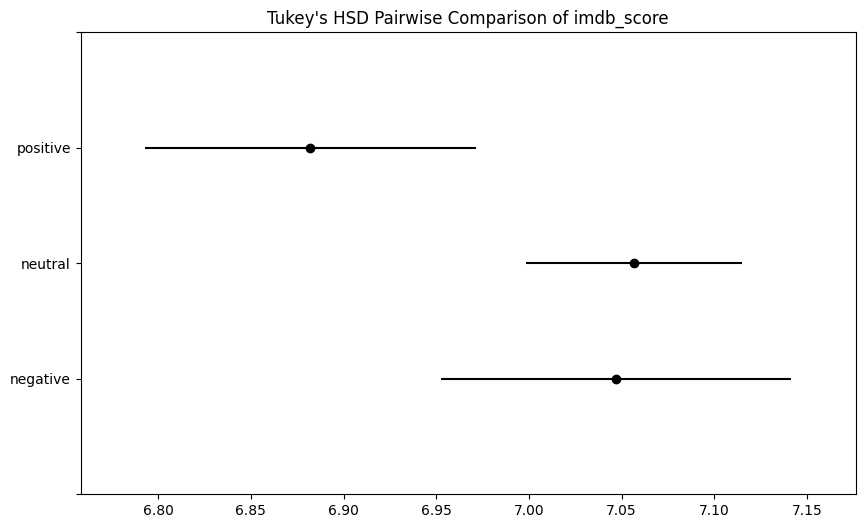

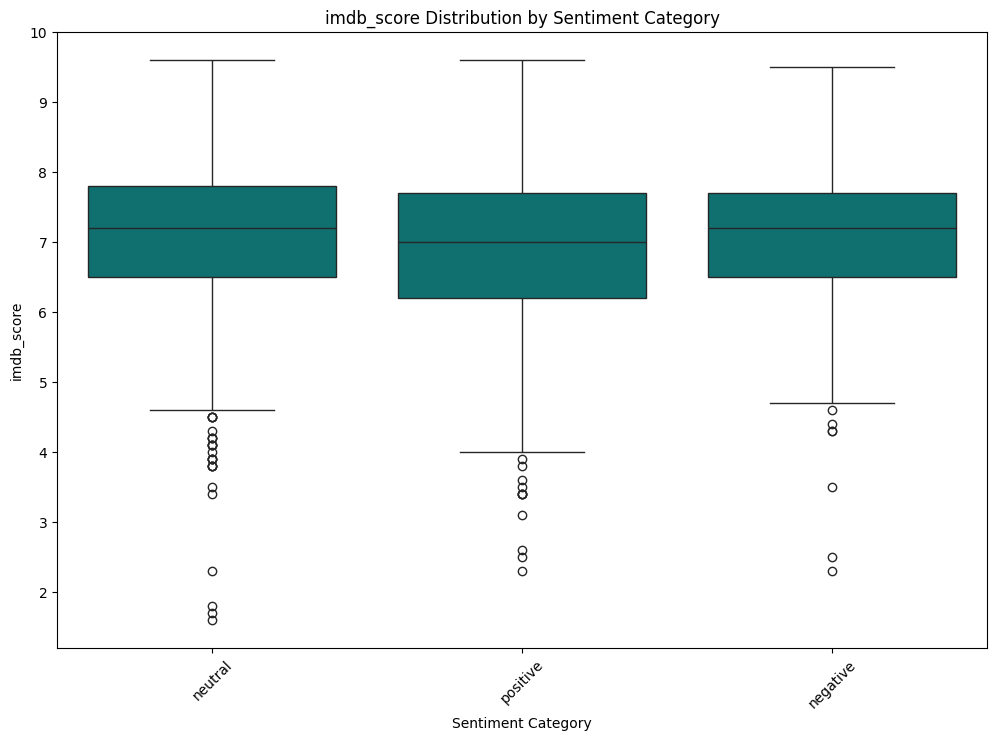

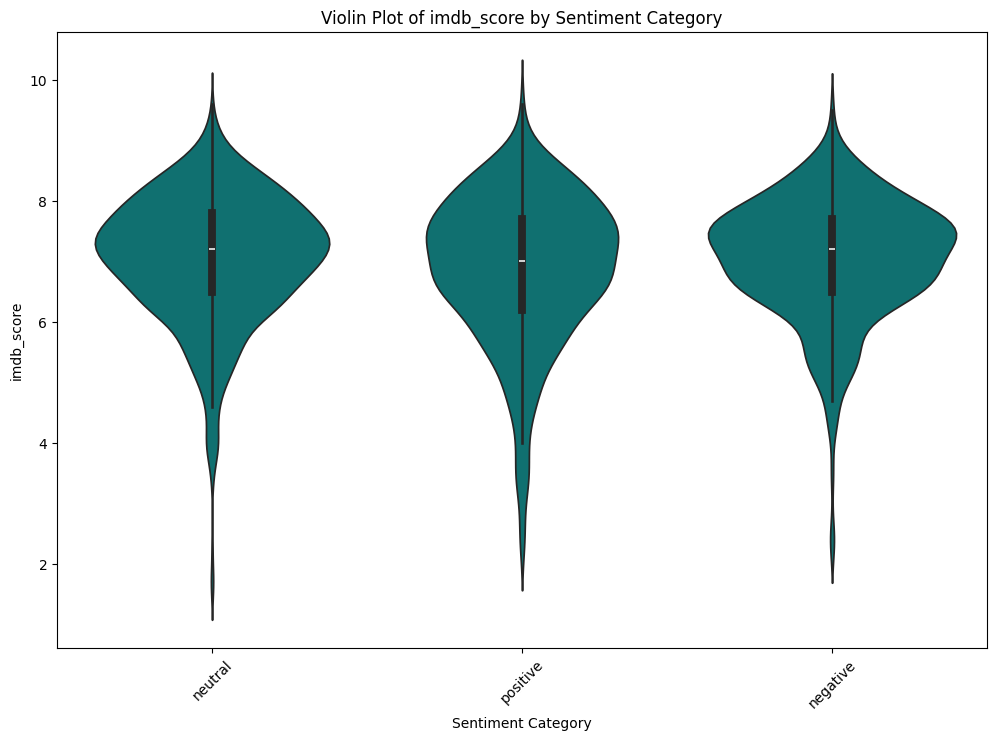

In [12]:
sentiment_anova(shows_df, "imdb_score")

## Q3: Do movies or shows on Netflix get better IMDb ratings (a) or more IMDb votes (b)?

In [13]:
def permutation_test(data1: pd.DataFrame,
                     data2: pd.DataFrame,
                     group1_name: str = "group_1",
                     group2_name: str = "group_2" ,
                     num_permutations: int = 10_000) -> Tuple[float, float, list[float]]:
    """
    Perform a random permutation test to compare two datasets and print the differences (if there are any).

    Parameters:
        data1 (DataFrame): First dataset.
        group1_name (str): name of the first dataset.
        data2 (DataFrame): Second dataset.
        group2_name (str): name of the second dataset.
        num_permutations (int): Number of permutations to perform.

    Returns:
        p_value (float): The p-value for the test.
        observed_diff (float): Observed difference between means.
        permuted_diff list[float]: 
    """
    # Combine the datasets
    combined = np.concatenate([data1, data2])
    # Calculate the observed difference in means
    observed_diff = np.mean(data1) - np.mean(data2)
    
    # List to store permutation differences
    permuted_diffs = []
    # Initialize a counter for permutations with more extreme differences
    extreme_count = 0
    
    for _ in range(num_permutations):
        # Shuffle the combined data
        np.random.shuffle(combined)
        # Split the shuffled data into two groups of the original sizes
        permuted_data1 = combined[:len(data1)]
        permuted_data2 = combined[len(data1):]
        # Calculate the difference in means for this permutation
        permuted_diff = np.mean(permuted_data1) - np.mean(permuted_data2)
        permuted_diffs.append(permuted_diff)
        # Check if the permuted difference is at least as extreme as the observed difference
        if abs(permuted_diff) >= abs(observed_diff):
            extreme_count += 1
    
    # Calculate the p-value
    p_value = extreme_count / num_permutations
    p_print = "p < .001" if p_value < .001 else f"p = {p_value:.3f}"
    
    if p_value < .05 and observed_diff < 0:
        print(f"The mean of {group1_name} is smaller by {abs(observed_diff):.2f} than the mean of {group2_name}, {p_print}.")
    elif p_value < .05 and observed_diff > 0:
        print(f"The mean of {group1_name} is larger by {observed_diff:.2f} than the mean of {group2_name}, {p_print}.")
    else:
        print(f"There isn't a significant difference between {group1_name} and {group2_name}, {p_print}")  
        
    return p_value, observed_diff, permuted_diffs

def plot_permutations(permuted_diffs, observed_diff):
    plt.figure(figsize=(12, 8))
    plt.hist(
        permuted_diffs,
        bins=30, 
        color='teal',
        edgecolor='black',
        label='Permutation Distribution'
    )
    plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed Difference: {observed_diff:.2f}')
    plt.title('Permutation Test: Distribution of Differences')
    plt.xlabel('Difference in Means')
    plt.ylabel('Frequency')
    plt.legend()


def plot_diff(data1: pd.Series,
              data2: pd.Series, 
              label1: str,
              label2: str,
              title: str,
              y_label: str) -> None:
    # Compute means for both data1 and data2
    data1_mean = data1.mean()
    data2_mean = data2.mean()
    
    #std_error calculation
    std_error1 = data1.std() / np.sqrt(len(data1))
    std_error2 = data2.std() / np.sqrt(len(data2))

    # Create a figure and axis
    plt.figure(figsize=(12, 8))
    # Plot the bar chart
    x = [0, 1]  
    plt.bar(
        x[0],  
        data1_mean,
        color='teal',
        edgecolor='black',
        label=label1,
        yerr=std_error1,
        capsize=5,
        ecolor="black"
    )
    plt.bar(
        x[1],  
        data2_mean,
        color='darkred',
        edgecolor='black',
        label=label2,
        yerr=std_error2,
        capsize=5,
        ecolor="black"
    )
    
    # Adding titles and labels
    plt.title(title)
    plt.xticks(x, [label1, label2])
    plt.ylabel(y_label)
    plt.legend()
    plt.tight_layout()



## Q3: Do movies or shows on Netflix get better IMDb ratings (a)?

The mean of movies_IMDb_score is smaller by 0.75 than the mean of shows_IMDb_score, p < .001.


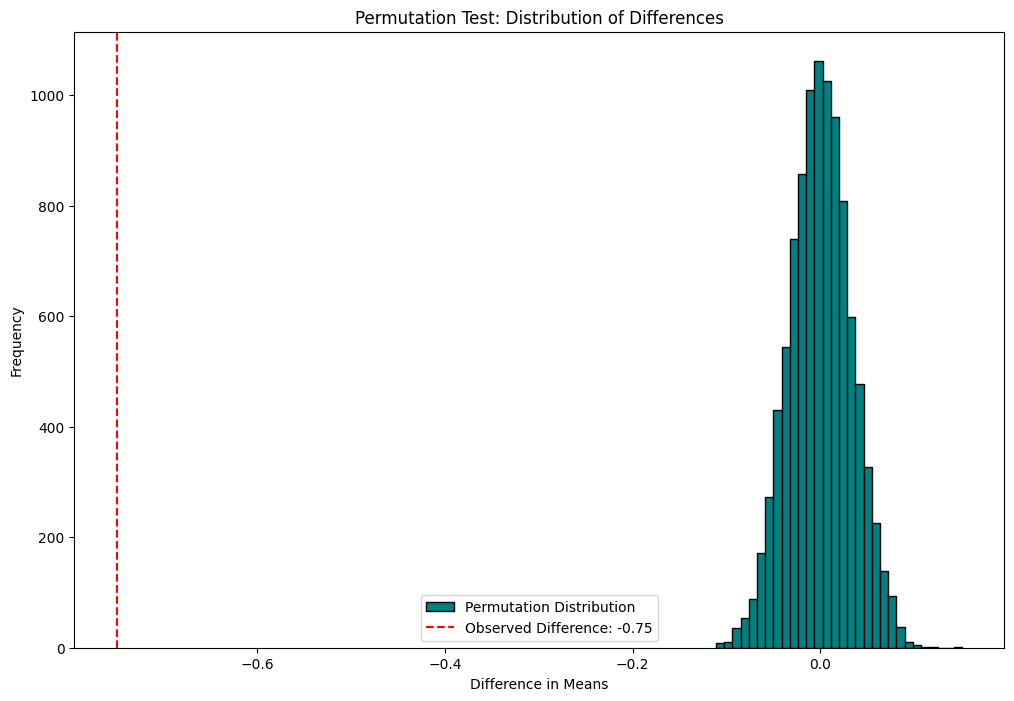

In [14]:
movies_df = movies_df.dropna(subset=["imdb_score"])
shows_df = shows_df.dropna(subset=["imdb_score"])

p, observed_diff, permuted_diffs = permutation_test(
    movies_df["imdb_score"],
    shows_df["imdb_score"],
    group1_name="movies_IMDb_score", 
    group2_name="shows_IMDb_score"
)
plot_permutations(permuted_diffs, observed_diff)

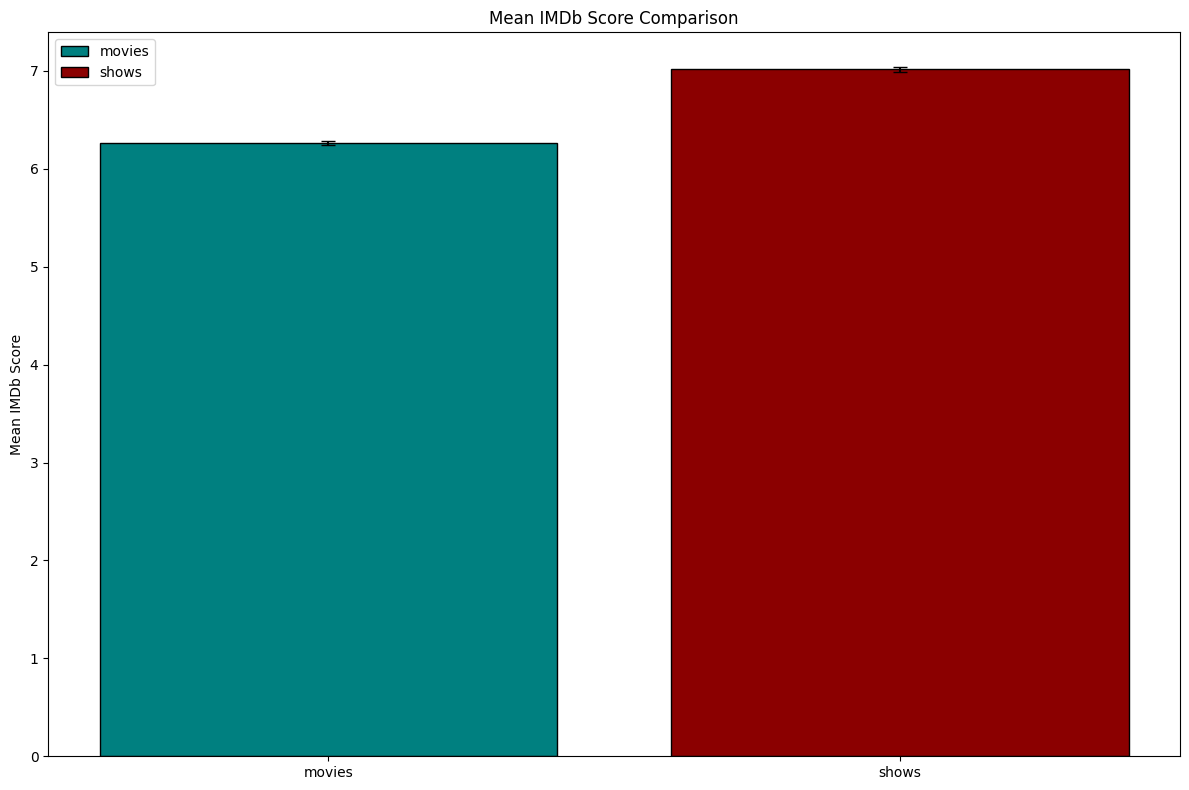

In [15]:
plot_diff(
    movies_df["imdb_score"],
    shows_df["imdb_score"],
    "movies",
    "shows",
    "Mean IMDb Score Comparison",
    "Mean IMDb Score"
    )

## Q3: Do movies or shows on Netflix get more IMDb votes (b)?

The mean of movies_IMDb_votes is larger by 9211.95 than the mean of shows_IMDb_votes, p < .001.


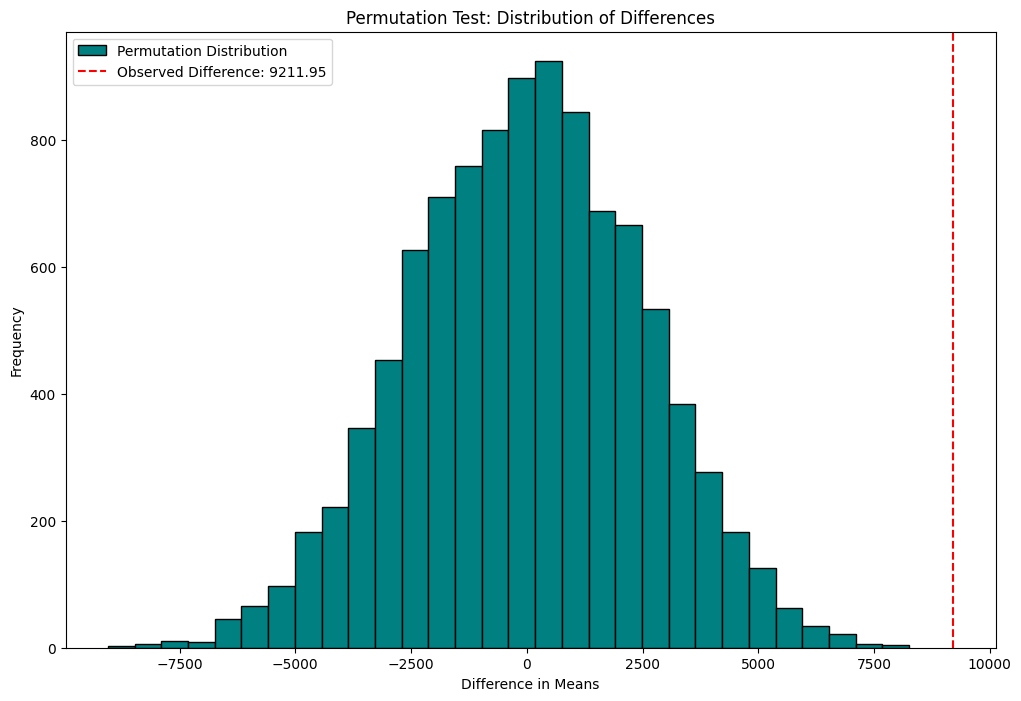

In [16]:
movies_df = movies_df.dropna(subset=["imdb_votes"])
shows_df = shows_df.dropna(subset=["imdb_votes"])

p, observed_diff, permuted_diffs = permutation_test(
    movies_df["imdb_votes"],
    shows_df["imdb_votes"],
    group1_name="movies_IMDb_votes", 
    group2_name="shows_IMDb_votes"
)
plot_permutations(permuted_diffs, observed_diff)

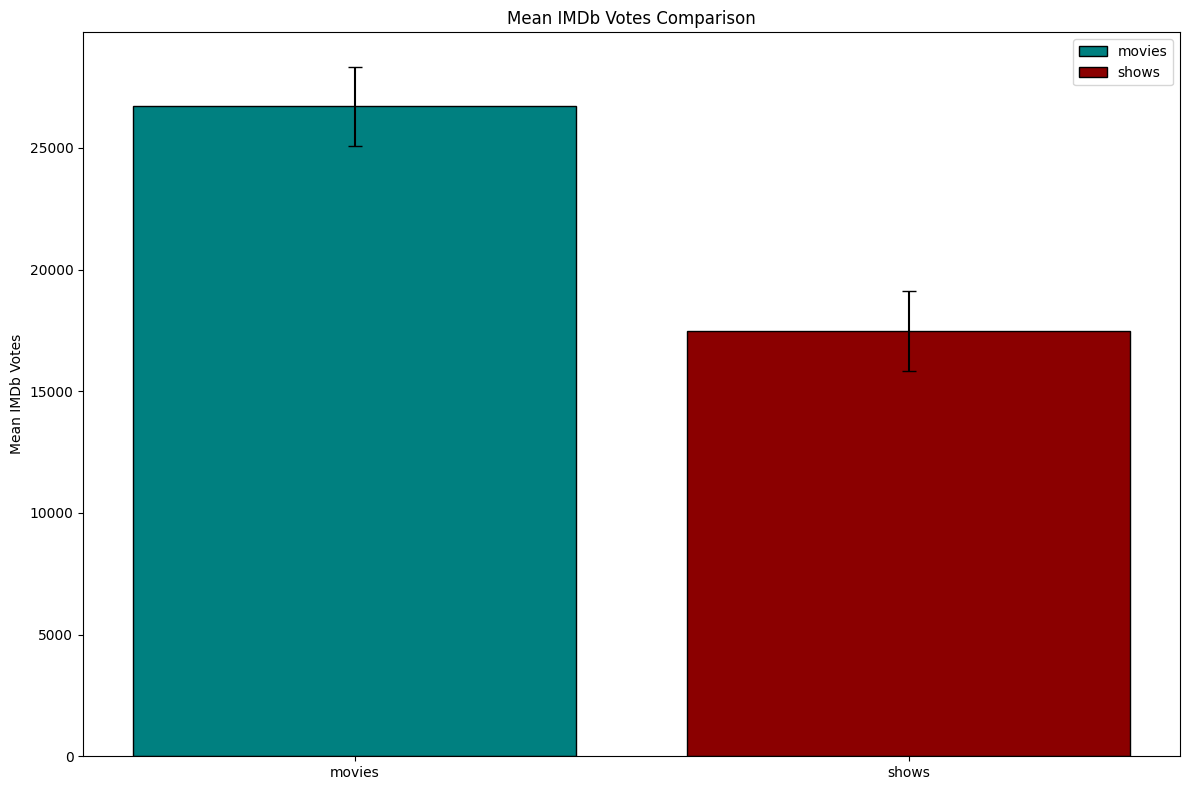

In [17]:
plot_diff(
    movies_df["imdb_votes"],
    shows_df["imdb_votes"],
    "movies",
    "shows",
    "Mean IMDb Votes Comparison",
    "Mean IMDb Votes"
    )